# Experiment 1 - Base line Example

This first experiment is designed to be of small enough scale that it can be run with all methods in just minutes and acts as an initial baseline test case to compare performance

In [1]:
%load_ext autoreload
%autoreload 2


In [24]:
import numpy as np
import pandas as pd


In [3]:
# Modify path to find code directory:
import sys
sys.path.append('../code/')


In [4]:
from structures import *
from datasets import Dataset


## Build the Network and Set up Environment

In [5]:
# Build agents from recipe:
Agent.reset()  # Reset IDs to zero.
ds = Dataset(seed=13)
ds.recipe2()
table = ds.build_agent_table()
display(table.head())

# Build environment:
ds.build_environment(
    transition_model = 'reachable',  # Set defaults models.
    policy_model = 'random_policy',  # (Can override them when calling build_* directly.)
    intervention_size=100,
)
env = ds.env
print(env)


,agent_id,workplace_id,specialty_id,inner_circle,inner_circle_size,outer_circle,outer_circle_size,informed_init,receptivity,persuasiveness
0,0,1,2,3,1,0;1;2;4,4,0,0.32,0.36
1,1,1,1,3,1,0;8,2,0,0.34,0.13
2,2,1,2,2,1,0;1,2,0,0.11,0.16
3,3,1,2,2,1,0;1;3,3,0,0.44,0.00
4,4,2,2,5,1,6;7;8,3,0,0.31,0.29


<Environment with 0/9 informed agents>


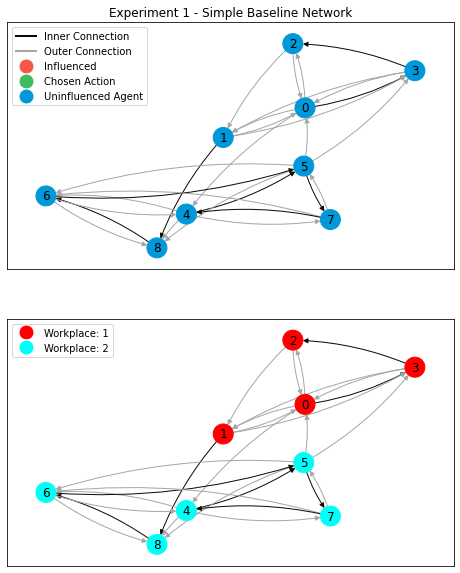

In [6]:
fig, axs = plt.subplots(2,1, figsize=(8,10))
ax0 = env.plot_network_graph(iterations=20, labels=False, colors="influence", rebuild=True, legend=True, seed=82, ax = axs[0])
ax1 = env.plot_network_graph(iterations=20, labels=False, colors="workplace", rebuild=True, legend=True, seed=82, ax = axs[1])
ax0.set_title("Experiment 1 - Simple Baseline Network")
plt.show()


### Set up Simulation Parameters

In [27]:
number_of_simulations = 1000
steps_between_influence = 6
simulation_steps = 20


### Method 1 - Totally Random Choice

In [8]:
# Build the policy - start with nobody influenced
env.build_policy(model='random_policy', n_selected=1)

m1_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m1_scores.append(score)

m1_score = np.mean(m1_scores)
print(f"Average Score for M1: {m1_score}")


Average Score for M1: 5.087


### Method 2 - Random Uninfluenced Agents

In [9]:
# Build the policy - start with nobody influenced
env.build_policy(model='random_useful_policy', n_selected=1)

m2_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m2_scores.append(score)

m2_score = np.mean(m2_scores)
print(f"Average Score for M2: {m2_score}")


Average Score for M2: 6.111


### Method 3 - Degree Centrality

In [10]:
# Build the policy - start with nobody influenced
env.build_policy(model='degree_centrality', n_selected=1)

m3_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m3_scores.append(score)

m3_score = np.mean(m3_scores)
print(f"Average Score for M3: {m3_score}")


Average Score for M3: 7.099


### Method 4 - Policy Iteration

In [11]:
# Build the policy - start with nobody influenced
env.build_transition_matrix(model='reachable', n_selected=1)
env.build_policy(model='policy_iteration')

m4_scores = []
# Run N simulations to get an average score
for _ in range(number_of_simulations):
    final_state = env.simulate_steps(n_steps=simulation_steps, dry_run=True, action_schedule=steps_between_influence, seed=None)[-1]
    score = final_state.n_informed
    m4_scores.append(score)

m4_score = np.mean(m4_scores)
print(f"Average Score for M4: {m4_score}")


Average Score for M4: 7.554


### Method 5 - Hierarchical Policy Iteration

In [22]:
# MISSING
m5_score = 6


## Plot Results

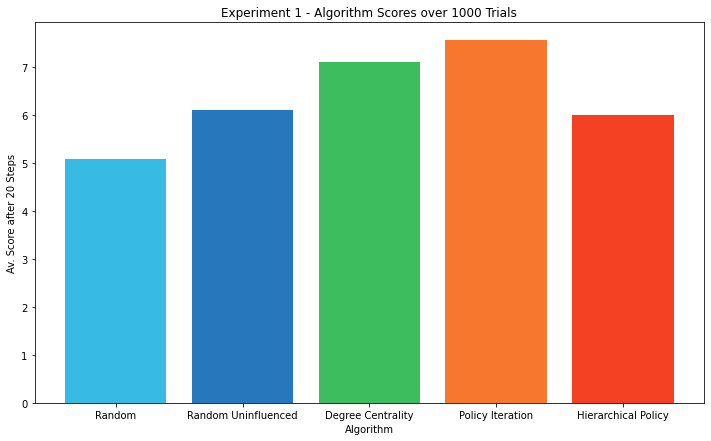

In [26]:
test_scores = [m1_score, m2_score, m3_score, m4_score, m5_score]
colors = ['#37bbe4','#2677bb','#3dbd5d','#f7772c', '#f54123']
bar_labels = ['Random','Random Uninfluenced','Degree Centrality','Policy Iteration','Hierarchical Policy']

plt.figure(figsize=(12,7))
plt.bar(bar_labels, test_scores, color=colors)
plt.xlabel("Algorithm")
plt.ylabel("Av. Score after 20 Steps")
plt.title("Experiment 1 - Algorithm Scores over 1000 Trials")
plt.show()
